#### Prepare rules for the all the data sets:- 
- Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 
- Change the minimum length in apriori algorithm 
- Visualize the obtained rules using different plots

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset

In [2]:
books_data= pd.read_csv('book.csv')
books_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


## 3. Initial Data Analysis

In [3]:
books_data.shape

(2000, 11)

In [4]:
books_data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [5]:
books_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

## 4. Preparing the data according to the Apriori Algorithm

### Expectation:- 2% Support , 20% confidence

In [6]:
frequent_item_sets_1 = apriori(df=books_data ,min_support=0.02, use_colnames=True,max_len=6) #Frequent itemsets
frequent_item_sets_1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(DoItYBks, RefBks, YouthBks, CookBks, ChildBks..."
272,0.0270,"(GeogBks, DoItYBks, RefBks, YouthBks, CookBks,..."
273,0.0310,"(GeogBks, DoItYBks, YouthBks, CookBks, ChildBk..."
274,0.0225,"(GeogBks, RefBks, YouthBks, CookBks, ChildBks,..."


In [7]:
rules1 = association_rules(df=frequent_item_sets_1 ,metric='confidence',min_threshold=0.20)

In [8]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
2348,"(CookBks, RefBks, ArtBks)","(ChildBks, GeogBks, DoItYBks)",0.0700,0.1045,0.024,0.342857,3.280930,0.016685,1.362717
2349,"(ChildBks, RefBks, ArtBks)","(GeogBks, DoItYBks, CookBks)",0.0760,0.1085,0.024,0.315789,2.910502,0.015754,1.302962
2350,"(GeogBks, RefBks)","(ChildBks, CookBks, DoItYBks, ArtBks)",0.1105,0.0820,0.024,0.217195,2.648714,0.014939,1.172705
2351,"(DoItYBks, RefBks)","(GeogBks, ChildBks, CookBks, ArtBks)",0.1055,0.0835,0.024,0.227488,2.724409,0.015191,1.186390


#### Data Visualization

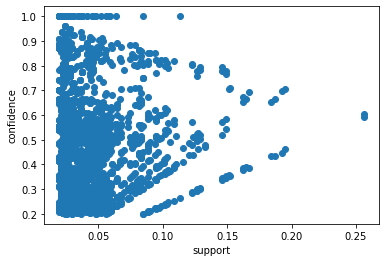

In [9]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 2% Support , 40% confidence

In [10]:
frequent_item_sets_2 = apriori(df=books_data ,min_support=0.02, use_colnames=True,max_len=6) #Frequent itemsets
frequent_item_sets_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(DoItYBks, RefBks, YouthBks, CookBks, ChildBks..."
272,0.0270,"(GeogBks, DoItYBks, RefBks, YouthBks, CookBks,..."
273,0.0310,"(GeogBks, DoItYBks, YouthBks, CookBks, ChildBk..."
274,0.0225,"(GeogBks, RefBks, YouthBks, CookBks, ChildBks,..."


In [11]:
rules2 = association_rules(df=frequent_item_sets_2 ,metric='confidence',min_threshold=0.40)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1371,"(CookBks, DoItYBks, RefBks, ArtBks)","(GeogBks, ChildBks)",0.0425,0.1950,0.024,0.564706,2.895928,0.015712,1.849324
1372,"(ChildBks, DoItYBks, RefBks, ArtBks)","(GeogBks, CookBks)",0.0460,0.1925,0.024,0.521739,2.710333,0.015145,1.688409
1373,"(GeogBks, DoItYBks, RefBks)","(CookBks, ChildBks, ArtBks)",0.0585,0.1265,0.024,0.410256,3.243134,0.016600,1.481152
1374,"(GeogBks, RefBks, ArtBks)","(ChildBks, CookBks, DoItYBks)",0.0565,0.1460,0.024,0.424779,2.909444,0.015751,1.484646


#### Data Visualization

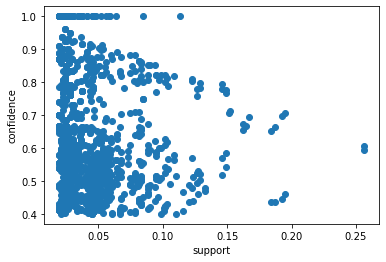

In [12]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 4% Support , 50% confidence

In [13]:
frequent_item_sets_3 = apriori(df=books_data ,min_support=0.04, use_colnames=True,max_len=5) #Frequent itemsets
frequent_item_sets_3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(GeogBks, RefBks, YouthBks, CookBks, ChildBks)"
129,0.0465,"(GeogBks, YouthBks, CookBks, ChildBks, ArtBks)"
130,0.0450,"(GeogBks, DoItYBks, RefBks, CookBks, ChildBks)"
131,0.0535,"(GeogBks, DoItYBks, CookBks, ChildBks, ArtBks)"


In [14]:
rules3 = association_rules(df=frequent_item_sets_3 ,metric='confidence',min_threshold=0.50)

In [15]:
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
367,"(GeogBks, ChildBks, RefBks, ArtBks)",(CookBks),0.0495,0.4310,0.0405,0.818182,1.898334,0.019166,3.129500
368,"(CookBks, ChildBks, RefBks, ArtBks)",(GeogBks),0.0610,0.2760,0.0405,0.663934,2.405560,0.023664,2.154341
369,"(GeogBks, RefBks, ArtBks)","(CookBks, ChildBks)",0.0565,0.2560,0.0405,0.716814,2.800055,0.026036,2.627250
370,"(CookBks, RefBks, ArtBks)","(GeogBks, ChildBks)",0.0700,0.1950,0.0405,0.578571,2.967033,0.026850,1.910169


#### Data Visualization

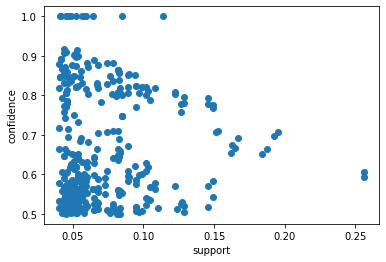

In [16]:
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 7% Support , 50% confidence

In [17]:
frequent_item_sets_4 = apriori(df=books_data ,min_support=0.07, use_colnames=True,max_len=4) #Frequent itemsets
frequent_item_sets_4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(RefBks, CookBks, ChildBks, DoItYBks)"
62,0.0820,"(CookBks, ChildBks, DoItYBks, ArtBks)"
63,0.0890,"(CookBks, ChildBks, DoItYBks, GeogBks)"
64,0.0785,"(CookBks, ChildBks, RefBks, GeogBks)"


In [18]:
rules4 = association_rules(df=frequent_item_sets_4 ,metric='confidence',min_threshold=0.50)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
128,"(CookBks, GeogBks, ArtBks)",(ChildBks),0.1035,0.4230,0.0835,0.806763,1.907242,0.039720,2.985975
129,"(GeogBks, ChildBks, ArtBks)",(CookBks),0.1020,0.4310,0.0835,0.818627,1.899368,0.039538,3.137189
130,"(CookBks, ArtBks)","(GeogBks, ChildBks)",0.1670,0.1950,0.0835,0.500000,2.564103,0.050935,1.610000
131,"(ChildBks, ArtBks)","(CookBks, GeogBks)",0.1625,0.1925,0.0835,0.513846,2.669331,0.052219,1.660997


#### Data Visualization

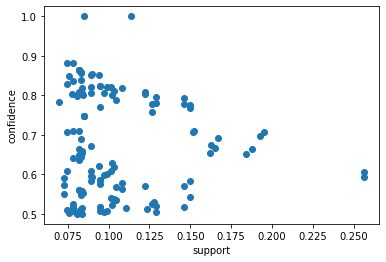

In [19]:
plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 10% Support , 90% confidence

In [20]:
frequent_item_sets_5 = apriori(df=books_data ,min_support=0.10, use_colnames=True,max_len=5) #Frequent itemsets
frequent_item_sets_5

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [21]:
rules5 = association_rules(df=frequent_item_sets_1 ,metric='confidence',min_threshold=0.90)

In [22]:
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
3,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
4,"(ItalAtlas, ChildBks)",(RefBks),0.0285,0.2145,0.0285,1.000000,4.662005,0.022387,inf
...,...,...,...,...,...,...,...,...,...
115,"(ItalCook, GeogBks, ItalArt)","(CookBks, ArtBks)",0.0240,0.1670,0.0240,1.000000,5.988024,0.019992,inf
116,"(GeogBks, CookBks, ItalArt)","(ItalCook, ArtBks)",0.0250,0.0565,0.0240,0.960000,16.991150,0.022587,23.5875
117,"(GeogBks, DoItYBks, RefBks, YouthBks, CookBks)",(ChildBks),0.0290,0.4230,0.0270,0.931034,2.201027,0.014733,8.3665
118,"(GeogBks, DoItYBks, RefBks, YouthBks, ChildBks)",(CookBks),0.0300,0.4310,0.0270,0.900000,2.088167,0.014070,5.6900


#### Data Visualization

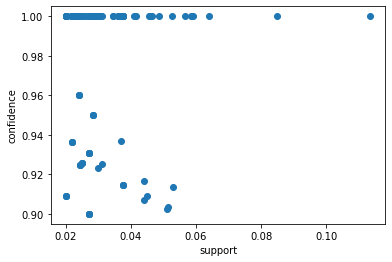

In [23]:
plt.scatter(rules5['support'],rules5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 7% Support , 90% confidence

In [24]:
frequent_item_sets_6 = apriori(df=books_data ,min_support=0.07, use_colnames=True,max_len=4) #Frequent itemsets
frequent_item_sets_6

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(RefBks, CookBks, ChildBks, DoItYBks)"
62,0.0820,"(CookBks, ChildBks, DoItYBks, ArtBks)"
63,0.0890,"(CookBks, ChildBks, DoItYBks, GeogBks)"
64,0.0785,"(CookBks, ChildBks, RefBks, GeogBks)"


In [25]:
rules6 = association_rules(df=frequent_item_sets_6 ,metric='confidence',min_threshold=0.90)

In [26]:
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf
1,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf


#### Data Visualization

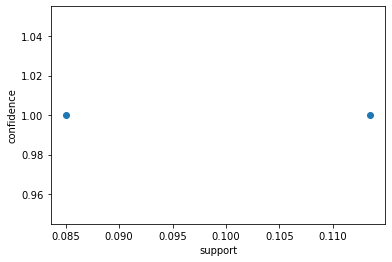

In [27]:
plt.scatter(rules6['support'],rules6['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 2% Support , 20% confidence

In [28]:
frequent_item_sets_7 = apriori(df=books_data ,min_support=0.02, use_colnames=True,max_len=2) #Frequent itemsets
frequent_item_sets_7

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.0370,(ItalAtlas)
9,0.0485,(ItalArt)


In [29]:
rules7 = association_rules(df=frequent_item_sets_7 ,metric='confidence',min_threshold=0.20)
rules7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
75,(Florence),(GeogBks),0.1085,0.2760,0.0425,0.391705,1.419221,0.012554,1.190212
76,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
77,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
78,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990


##### So From Above 7 cases we observed that,
- Lower the Confidence level Higher the no. of rules and vice-versa
- Higher the Support, lower the no. of rules.
- Higher the max length , higher the no.of rules

*So, we can conclude that these 3 parameters' different combinations can generate different rules.*

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**